In [1]:
"""Imports"""
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
"""Load up the benzene data"""
path_to_file = Path(Path.cwd().parents[1], "Data", "Benzene.csv")
benzene = pd.read_csv(path_to_file)

In [ ]:
"""Look at the data stats"""
benzene.describe()

,C6H6(GT),PT08.S5(O3),Temperature (C),Relative Humidity,Absolute Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,0.158477,0.352539,0.432977,0.503036,0.408015
std,0.117984,0.175694,0.188856,0.216283,0.196551
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069182,0.222415,0.292473,0.334591,0.267605
50%,0.128931,0.325369,0.419355,0.508176,0.393295
75%,0.220126,0.465682,0.563441,0.667925,0.548307
max,1.000000,1.000000,1.000000,1.000000,1.000000


Looks like there are probably some outliers in the C6H6 data.  This may indicate some sort of error in our ground truth data.

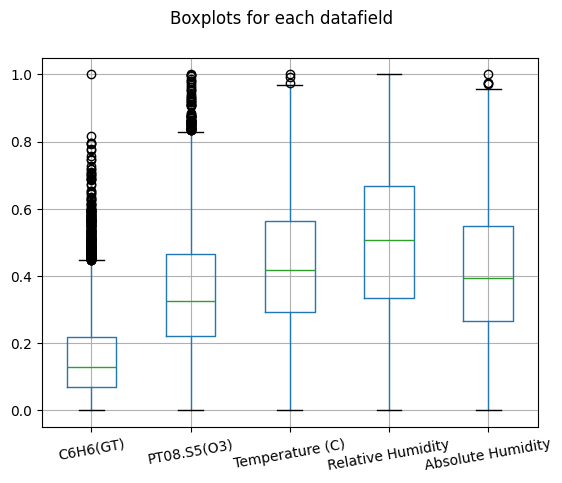

In [ ]:
"""Look at boxplots to identify outliers"""
columns_of_interest = benzene.columns[2:-1]
benzene[columns_of_interest].boxplot()
plt.suptitle("Boxplots for each datafield")
plt.xticks(rotation=10)
plt.show()

Its probably worth replacing that super high outlyer from C6H6 with the datas mean to see how that changes data.

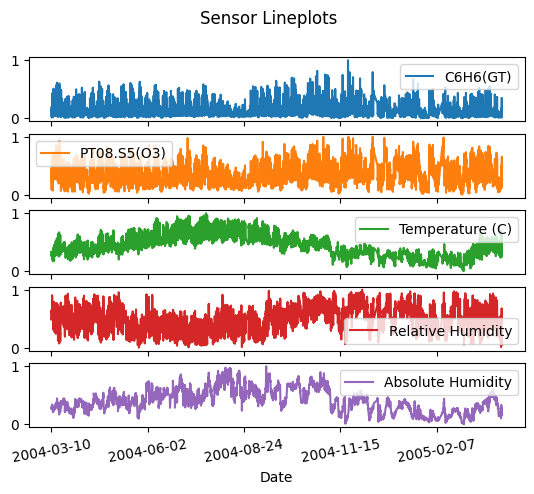

In [ ]:
"""Visualize the datapoints"""
benzene.plot("Date", columns_of_interest, subplots=True)
plt.suptitle("Sensor Lineplots")
plt.xticks(rotation=10)
plt.show()

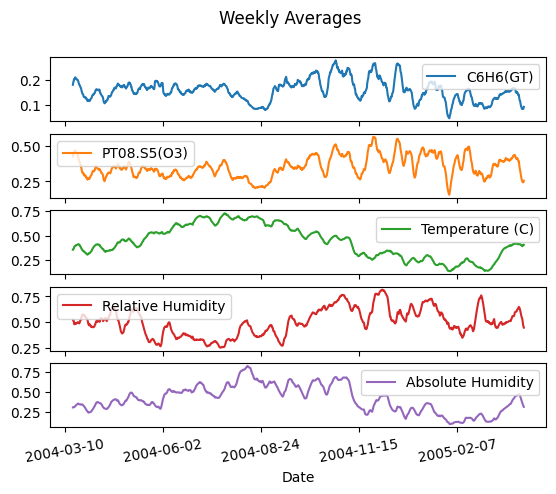

In [24]:
"""Smooth the datapoints using the weekly average"""
weekly_average = benzene.copy()
weekly_average[columns_of_interest]= benzene[columns_of_interest].rolling(7 * 24).mean()

weekly_average.plot("Date", columns_of_interest, subplots=True)
plt.suptitle("Weekly Averages")
plt.xticks(rotation=10)
plt.show()

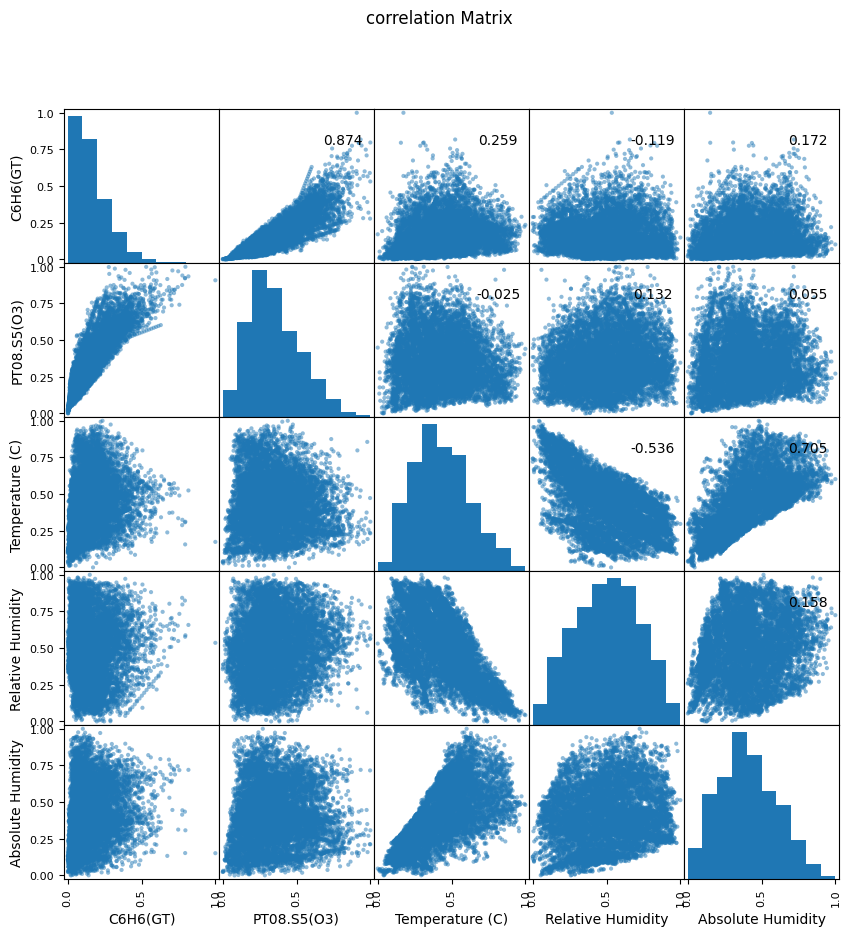

In [26]:
"""Look for correlation and data distribution"""
axes = pd.plotting.scatter_matrix(benzene[columns_of_interest], alpha=0.5, figsize = [10,10])
corr = benzene[columns_of_interest].corr(method = "spearman").to_numpy()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
	axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")
plt.suptitle("correlation Matrix")
plt.show()

There appears to be a very solid correlation between the O3 data and the C6H6 data.  This is a very good sign that our O3 sensor will be a suitable substitute for the C6H6 sensor.  Again, we see signs that our C6H6 data may have some outliers.  O3 may as well but to a much lessor degree.  However, the fact that these two are so highly correlated, coupled with the fact that the outliers appears to be on the upper bound side for both of them, quasi-legitimizes the data as potential valid.  The only value I would consider removing would be the single point of max value from the C6H6 dataset.